In [1]:
import csv 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Lendo e tranformando o csv em uma base de dados
life_exp = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_4700946.csv", sep=",",skiprows=4)
gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv", sep=",", skiprows=4)
gini = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_4701295.csv", sep=",", skiprows=4)
inflacao = pd.read_csv("API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4701153.csv", sep=",", skiprows=4)
saneamento = pd.read_csv(r"C:\Users\João Vitor\Documents\Insper\2°_semestre\Ciencia_dos_dados\projeto_2\22-2a-cd-p2-grupo_joaovoa-1\saneamento\f8768fb8-96fc-4d9c-89b2-59891e4e3105_Data.csv", sep=",", skiprows=4)

In [3]:
# Definindomos países que vamos trabalhar
paises = ["United States", "Brazil", "Russian Federation", "India", "China", "South Africa", "Uruguay", "Germany", "Denmark", "Netherlands", "Switzerland", "Italy", "France", "Sweden", "Portugal", "United Kingdom", "Belgium", "Japan", "Singapore","New Zealand"]
n_pais = [251, 29, 202, 109, 40, 263, 250, 55, 58, 176, 37, 116, 77, 223, 194, 81, 17, 119, 208, 180 ]
cores = ["blue", "green", "red","orange", "red", "green", "blue", "black", "red", "orange", "pink", "blue", "blue", "yellow", "violet", "blue", "yellow", "silver", "violet", "purple" ]

In [4]:
# Filtrando os dados que desejamos utilizar no nosso trabalho
life_exp = life_exp.loc[:,["Country Name", "Country Code","2020"]]
gdp = gdp.loc[:,["Country Name", "Country Code","2018", "2019", "2020"]]
gini = gini.loc[:,["Country Name", "Country Code","2018"]]
inflacao = inflacao.loc[:,["Country Name", "Country Code","2018","2019","2020"]]

In [5]:
regioes = ["Europe","South America","Europe","Asia","Europe","Europe","Europe","Europe","Asia","Europe","Asia","Europe","Oceania","Europa", "Asia","Asia","Europe","South America","North America","Africa"]

In [6]:
# Filtrando nossas bases com base nos países que queremos trabalhar
life_exp = life_exp.loc[life_exp["Country Name"].isin(paises),:]
gdp = gdp.loc[gdp["Country Name"].isin(paises),:]
gini = gini.loc[gini["Country Name"].isin(paises),:]
inflacao = inflacao.loc[inflacao["Country Name"].isin(paises),:]
saneamento = saneamento.loc[saneamento["Albania"].isin(paises),:]

life_exp["Region"] = regioes
gdp["Region"] = regioes
gini["Region"] = regioes
inflacao["Region"] = regioes
saneamento["Region"] = regioes

In [7]:
# Não tô sabendo trabalhar com ela 

#saneamento.head()

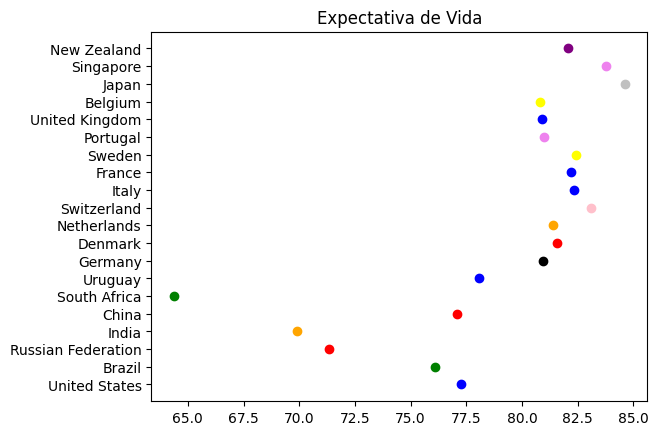

In [8]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = life_exp.loc[j,"2020"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)
    
plt.title("Expectativa de Vida")
plt.show()

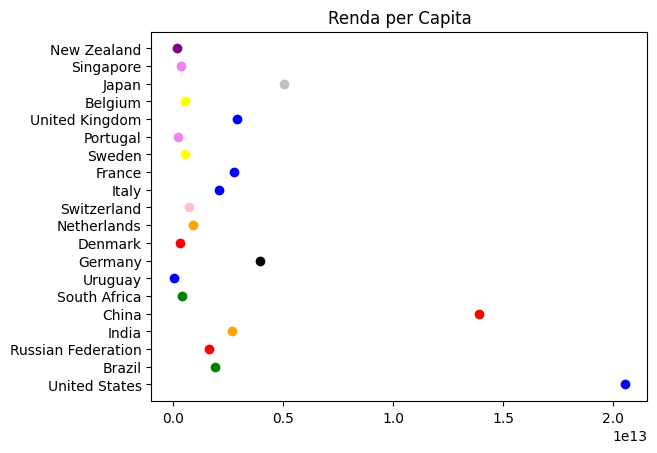

In [9]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = gdp.loc[j,"2018"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)

plt.title("Renda per Capita")
plt.show()

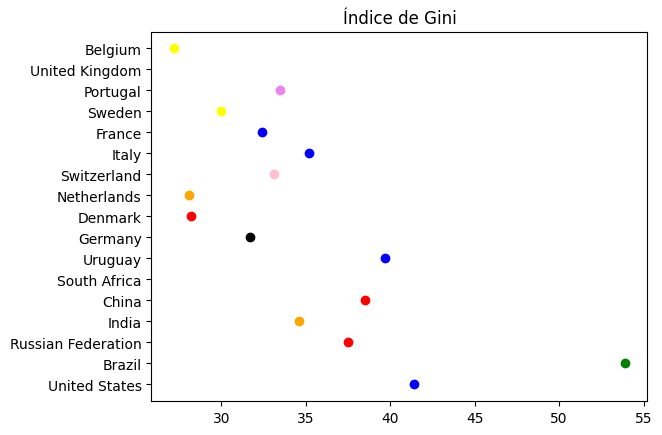

In [10]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = gini.loc[j,"2018"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)

plt.title("Índice de Gini")
plt.show()

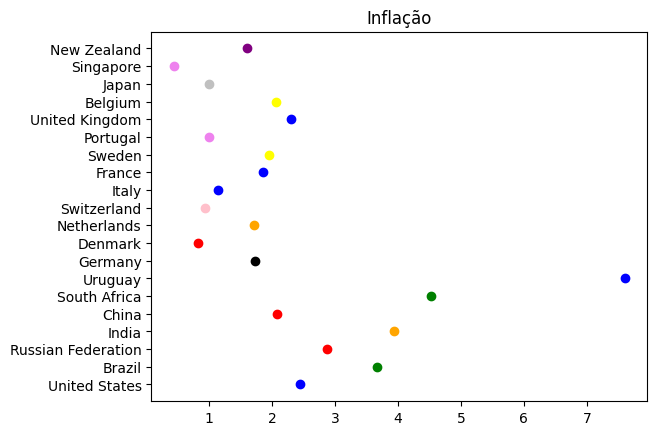

In [11]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = inflacao.loc[j,"2018"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)
    
plt.title("Inflação");
plt.show()

In [12]:
life_exp = life_exp.drop(columns=['Country Code', 'Region'])
gdp = gdp.drop(columns=['Country Code', 'Region'])
gini = gini.drop(columns=['Country Code', 'Region'])
inflacao = inflacao.drop(columns=['Country Code', 'Region'])
inflacao.head()

,Country Name,2018,2019,2020
17,Belgium,2.053165,1.436820,0.740792
29,Brazil,3.664850,3.732976,3.211768
37,Switzerland,0.936335,0.362886,-0.725875
40,China,2.074790,2.899234,2.419422
55,Germany,1.732168,1.445667,0.506690


In [13]:
life_exp_index = life_exp.set_index('Country Name')
gdp_index = gdp.set_index('Country Name')
gini_index = gini.set_index('Country Name')
inflacao_index = inflacao.set_index('Country Name')

df1 = life_exp_index.join(gdp_index, how='inner', lsuffix='life', rsuffix='gdp')
df2 = df1.join(gini_index, how='inner', lsuffix='gdp', rsuffix='gini')
df3 = df2.join(inflacao_index, how='inner', lsuffix='', rsuffix='inflacao')
df2.head()

,2020life,2018gdp,2019,2020gdp,2018gini
Country Name,,,,,
Belgium,80.795122,5.433474e+11,5.353763e+11,5.216769e+11,27.2
Brazil,76.084000,1.916934e+12,1.873288e+12,1.448566e+12,53.9
Switzerland,83.100000,7.355393e+11,7.317674e+11,7.522480e+11,33.1
China,77.097000,1.389482e+13,1.427994e+13,1.468767e+13,38.5
Germany,80.941463,3.977289e+12,3.888327e+12,3.846414e+12,31.7


In [14]:
df3.head()
# primeira coluna : nomes dos países
# segunda coluna : expectativa de vida em 2020
# terceira, quarta e quinta colunas: PIB per capita nos anos de 2018, 2019 e 2020
# sexta coluna: gini em 2018
# sétima, oitava e nona: inflação dos anos 2018, 2019 e 2020

,2020life,2018gdp,2019,2020gdp,2018gini,2018,2019inflacao,2020
Country Name,,,,,,,,
Belgium,80.795122,5.433474e+11,5.353763e+11,5.216769e+11,27.2,2.053165,1.436820,0.740792
Brazil,76.084000,1.916934e+12,1.873288e+12,1.448566e+12,53.9,3.664850,3.732976,3.211768
Switzerland,83.100000,7.355393e+11,7.317674e+11,7.522480e+11,33.1,0.936335,0.362886,-0.725875
China,77.097000,1.389482e+13,1.427994e+13,1.468767e+13,38.5,2.074790,2.899234,2.419422
Germany,80.941463,3.977289e+12,3.888327e+12,3.846414e+12,31.7,1.732168,1.445667,0.506690
